In [213]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [214]:
X, y = mglearn.datasets.make_forge()

/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


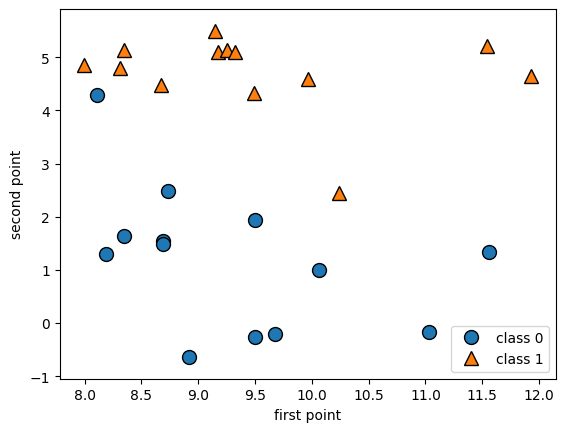

In [215]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("first point")
plt.ylabel("second point")
print("X.shape:", X.shape)

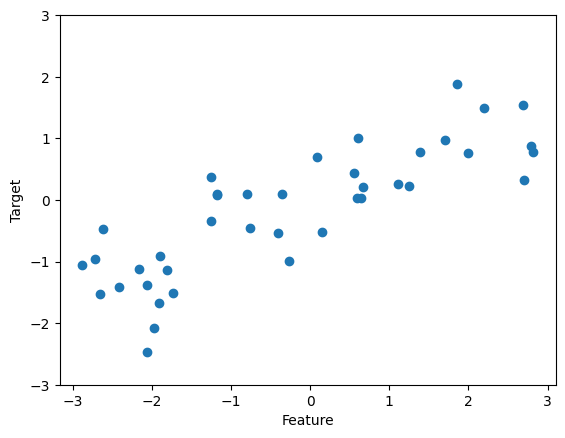

In [216]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [217]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key():\n", cancer.keys())

cancer.key():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [218]:
print("The shape of breast cancer data", cancer.data.shape)

The shape of breast cancer data (569, 30)


In [219]:
print("Class sample num:\n", {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

Class sample num:
 {'malignant': 212, 'benign': 357}


In [220]:
print("Type Name: \n", cancer.feature_names)

Type Name: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [221]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data Type:", boston.data.shape)

Data Type: (506, 13)


/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [222]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


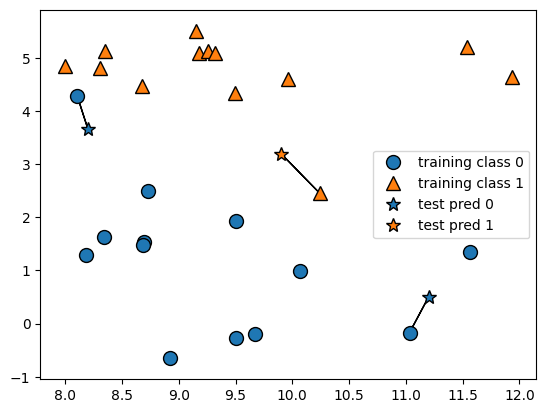

In [223]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


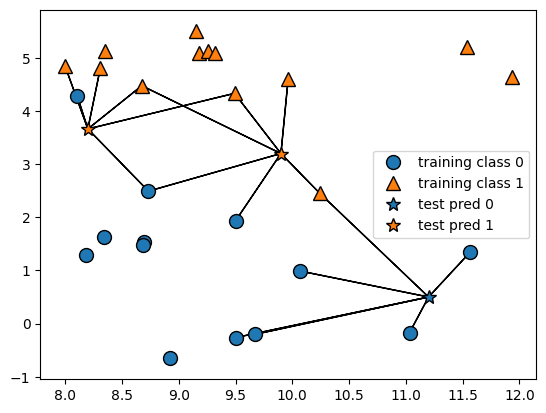

In [224]:
mglearn.plots.plot_knn_classification(n_neighbors=6)

In [225]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [227]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)


In [228]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [229]:
print("test set : ", clf.predict(X_test))

test set :  [1 0 1 0 1 0 0]


In [230]:
print("Test Point: {:.2f}".format(clf.score(X_test, y_test)))

Test Point: 0.86


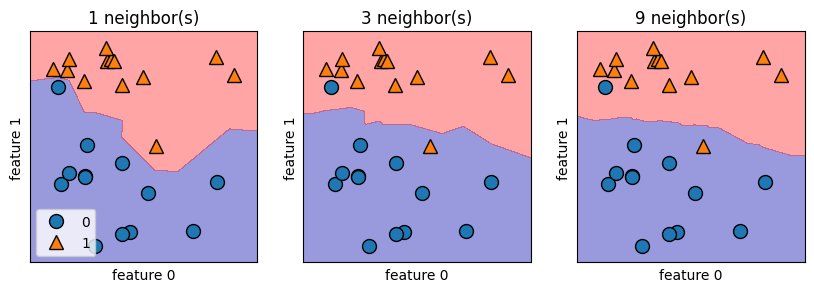

In [231]:

fix, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

plt.show()

In [232]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

neighbors_settings = [1, 3, 9]

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train) * 100  # 훈련 정확도를 백분율로 변환
    test_accuracy = clf.score(X_test, y_test) * 100  # 테스트 정확도를 백분율로 변환
    print("{} neighbor(s) - Train Accuracy: {:.2f}% | Test Accuracy: {:.2f}%"
          .format(n_neighbors, train_accuracy, test_accuracy))

1 neighbor(s) - Train Accuracy: 100.00% | Test Accuracy: 90.21%
3 neighbor(s) - Train Accuracy: 95.77% | Test Accuracy: 92.31%
9 neighbor(s) - Train Accuracy: 93.43% | Test Accuracy: 91.61%


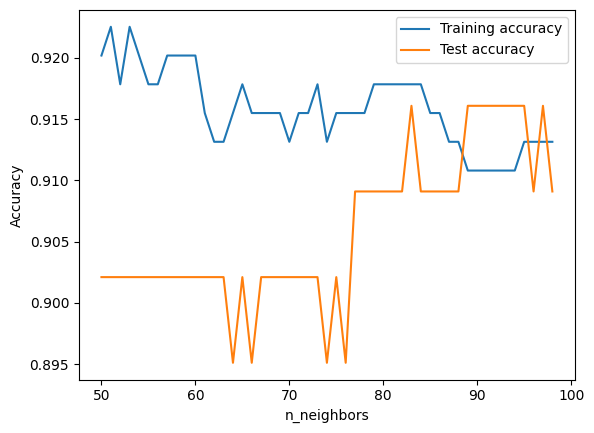

In [233]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(50, 99)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

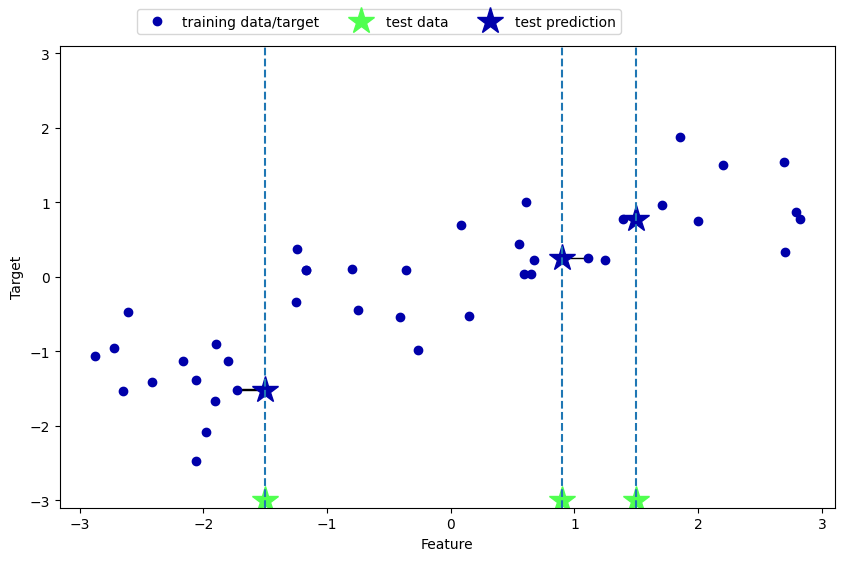

In [234]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

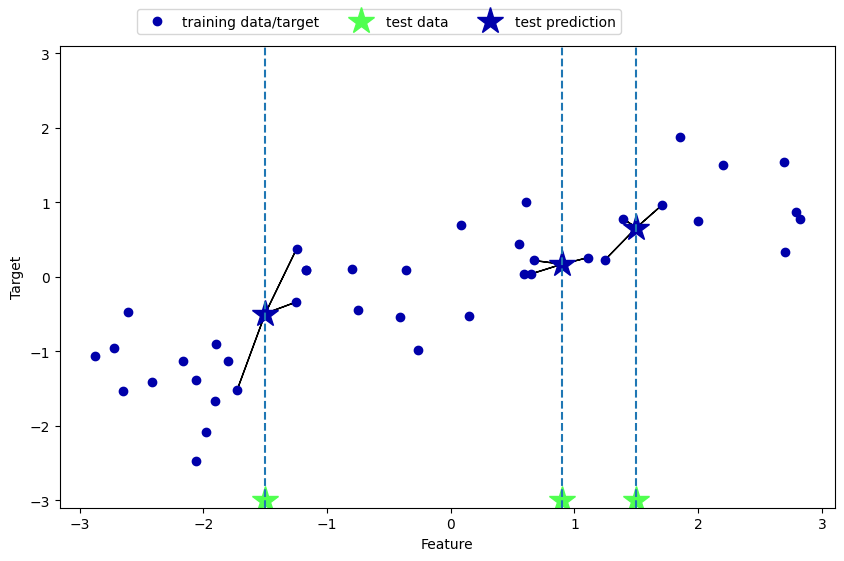

In [235]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

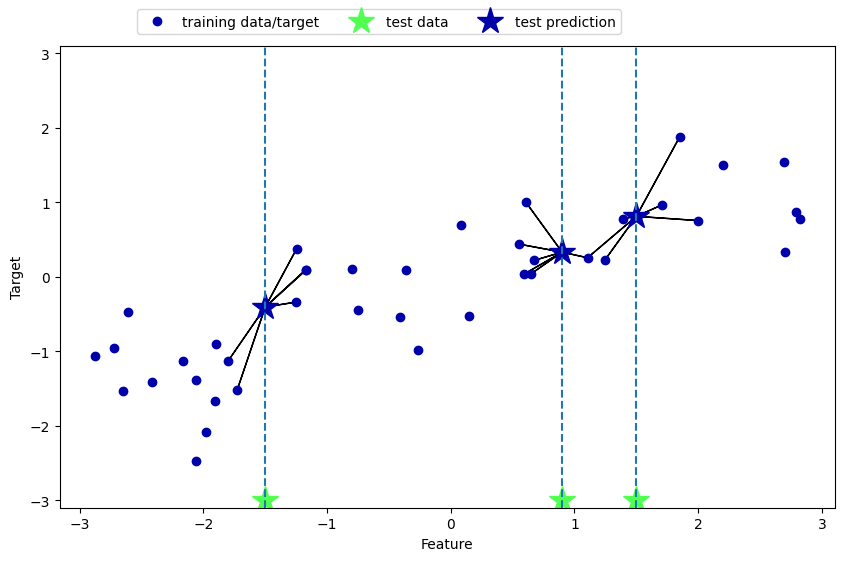

In [236]:
mglearn.plots.plot_knn_regression(n_neighbors=6)

In [237]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)
print("Test set prediction:\n", reg.predict(X_test))

Test set prediction:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [238]:
print("Test Set Prediction R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test Set Prediction R^2: 0.83


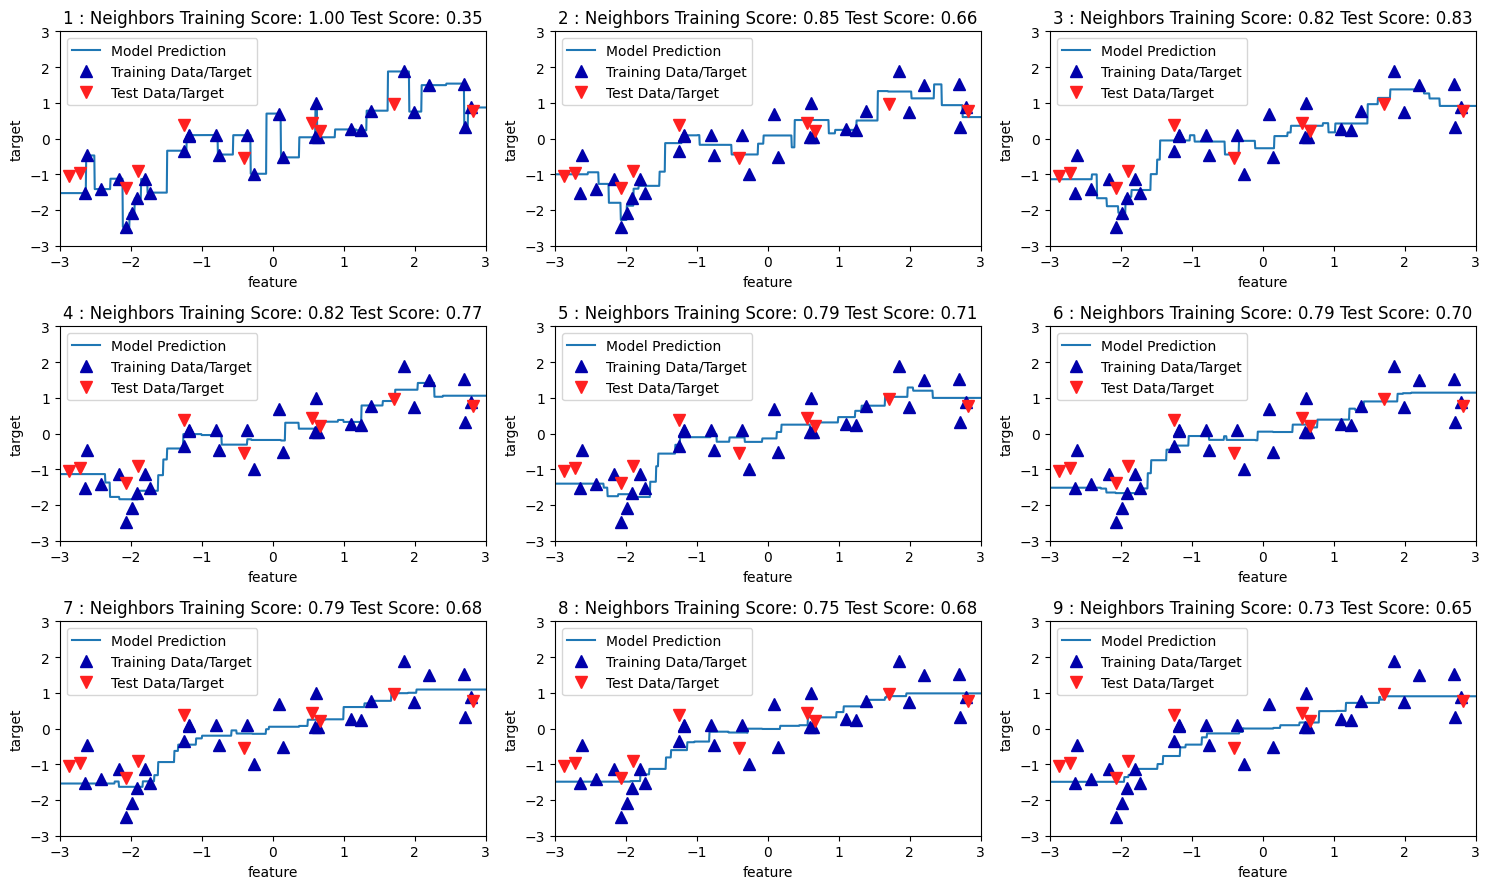

In [247]:

fig, axes = plt.subplots(3, 3, figsize=(15, 9))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,2,3,4,5,6,7,8,9], axes.ravel()):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    prediction = reg.predict(line) 

    ax.plot(line, prediction)
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} : Neighbors Training Score: {:.2f} Test Score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.legend(["Model Prediction", "Training Data/Target",
                "Test Data/Target"], loc="best")

plt.tight_layout()
plt.show()